# NLP for content based

## data preprocessing

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../raw_data/rawg_games.csv')

In [9]:
list(df)

['Unnamed: 0',
 'game_id',
 'slug',
 'name',
 'description',
 'released',
 'rating',
 'detail_ratings',
 'ratings_count',
 'suggestions_count',
 'game_series_count',
 'reviews_count',
 'metacritic',
 'game_platforms',
 'game_genres',
 'game_tags',
 'developers',
 'publishers']

In [117]:
df.tail()

,game_id,slug,name,description,released,rating,detail_ratings,ratings_count,suggestions_count,game_series_count,reviews_count,metacritic,game_platforms,game_genres,game_tags,developers,publishers,metadata
17690,10350,gocco of war,GOCCO OF WAR,"Enter the studio, and join a make-believe war ...",2015-11-17,0.00,3|meh|2|100.0,2,441,0,2,NaN,4|PC,"Action, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...","13671|O-TWO, 4352|peakvox",3777|AGM PLAYISM,gocco of war action casual indie singleplaye...
17691,15836,conquest of elysium 4,Conquest of Elysium 4,Conquest of Elysium 4 is a quick turn based fa...,2015-11-16,0.00,4|recommended|1|100.0,1,248,0,1,NaN,"6|Linux, 4|PC, 5|macOS","Strategy, Indie","Singleplayer, Multiplayer, Co-op, Fantasy, Spl...",7602|Illwinter Game Design,6383|Illwinter Game Design,conquest of elysium 4 strategy indie singlepl...
17692,49840,dominions 5 warriors of the faith,Dominions 5 - Warriors of the Faith,You are a God! You are master and ruler of a l...,2017-11-27,0.00,"5|exceptional|1|50.0, 4|recommended|1|50.0",2,376,0,2,NaN,"5|macOS, 6|Linux, 4|PC","Strategy, Indie","Singleplayer, Multiplayer, Co-op, Fantasy, Onl...",7602|Illwinter Game Design,6383|Illwinter Game Design,dominions 5 warriors of the faith strategy in...
17693,4735,red faction battlegrounds,Red Faction: Battlegrounds,The signature destructive gameplay from Red Fa...,2011-04-05,0.00,"3|meh|3|75.0, 4|recommended|1|25.0",4,606,0,4,NaN,"16|PlayStation 3, 14|Xbox 360","Action, Shooter, Arcade","battle, online, Mod, environment, destroy, tan...","84|THQ Nordic, 14787|THQ, 19009|THQ Digital Wa...",6062|THQ,red faction battlegrounds action shooter arc...
17694,3436,super stardust ultra,Super Stardust Ultra,The fate of the galaxy is in your hands.<br/><...,2015-02-10,4.11,"4|recommended|4|44.44, 5|exceptional|3|33.33, ...",9,468,0,9,NaN,18|PlayStation 4,nan,"exclusive, true exclusive",6|Sony Interactive Entertainment,nan,super stardust ultra nan exclusive true exclu...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            17695 non-null  int64  
 1   slug               17695 non-null  object 
 2   name               17695 non-null  object 
 3   description        17601 non-null  object 
 4   released           17000 non-null  object 
 5   rating             17695 non-null  float64
 6   detail_ratings     14926 non-null  object 
 7   ratings_count      17695 non-null  int64  
 8   suggestions_count  17695 non-null  int64  
 9   game_series_count  17695 non-null  int64  
 10  reviews_count      17695 non-null  int64  
 11  metacritic         3830 non-null   float64
 12  game_platforms     17693 non-null  object 
 13  game_genres        17263 non-null  object 
 14  game_tags          17155 non-null  object 
 15  developers         17458 non-null  object 
 16  publishers         171

In [10]:
df = df.drop(columns='Unnamed: 0')

In [102]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def replace_slash(text):
    punctuations = string.punctuation.replace("|", "")+'•'
    for punctuation in punctuations:
        text = text.replace(punctuation, ' ')
    text = text.replace('br', '')
    return text.lower()

In [97]:
t='coffee<br/>• No hidden costs or cheap tricks 181849|Florian Grolig 42334|Florian Grolig'

In [101]:
t.strip('<br/')

'coffee<br/>• No hidden costs or cheap tricks 181849|Florian Grolig 42334|Florian Grolig'

In [19]:
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer([
#                                 ('replace_slash', replace_slash, ['slug']),
#                                 ('replace_comma', replace_comma, ['game_genres',
#                                                                   'game_tags',
#                                                                   'description',
#                                                                   'developers',
#                                                                   'publishers'])])

In [76]:
df["slug"] = df["slug"].astype(str)
df["game_genres"] = df["game_genres"].astype(str)
df["game_tags"] = df["game_tags"].astype(str)
df["description"] = df["description"].astype(str)
df["developers"] = df["developers"].astype(str)
df["publishers"] = df["publishers"].astype(str)

AttributeError: 'Series' object has no attribute 'lower'

In [56]:
# df['metadata'] = df[['slug',
#                      'game_genres',
#                      'game_tags',
#                      'description',
#                      'developers',
#                      'publishers']].apply(lambda x: ' '.join(x, axis = 1)

SyntaxError: unexpected EOF while parsing (<ipython-input-56-a5f19a294401>, line 6)

In [103]:
df['metadata']=df["slug"]+' '+df["game_genres"]+' '+df["game_tags"]+' '+df["description"]+' '+df["developers"]+' '+df["publishers"]

In [104]:
df['metadata'][0]

'high rise a puzzle cityscape Casual, Puzzle Space, city, friends, fun, match, cubes High Rise is a innovative take on the match 3 genre. A relaxed casual puzzle experience. Match colourful cubes and watch them merge, grow and your 3D puzzle cityscape rise.<br/><br/>The game is complete in its free version but will show you ads occasionally. Those who prefer an add-free experience can remove them with the cheapest possible In-App-Purchase and also support us updating this game and creating new ones.<br/>No hidden costs or cheap tricks. <br/><br/>Easily Rotate your 3D city with a swipe of your finger, place cubes with a tab and let them merge and grow higher. And higher. And higher... <br/>Simple and engaging gameplay that is easy to learn but leaves a lot of space for your own tactics and personal improvement.<br/><br/>• Innovative but easy gameplay<br/>• Simple and fun mechanics<br/>• A Relaxed puzzle experience<br/>• See your colorful city grow<br/>• Compare your city score with your

In [105]:
df['metadata']=df['metadata'].apply(lambda x: replace_slash(x))

In [106]:
df['metadata'][0]

'high rise a puzzle cityscape casual  puzzle space  city  friends  fun  match  cubes high rise is a innovative take on the match 3 genre  a relaxed casual puzzle experience  match colourful cubes and watch them merge  grow and your 3d puzzle cityscape rise       the game is complete in its free version but will show you ads occasionally  those who prefer an add free experience can remove them with the cheapest possible in app purchase and also support us updating this game and creating new ones    no hidden costs or cheap tricks        easily rotate your 3d city with a swipe of your finger  place cubes with a tab and let them merge and grow higher  and higher  and higher       simple and engaging gameplay that is easy to learn but leaves a lot of space for your own tactics and personal improvement         innovative but easy gameplay     simple and fun mechanics     a relaxed puzzle experience     see your colorful city grow     compare your city score with your friends and the whole w

In [48]:
len(df['metadata'][0])

1172

In [79]:
metadata = np.array(df['metadata'])

In [81]:
metadata[0]

['high',
 'rise',
 'puzzle',
 'cityscape',
 'Casual',
 'Puzzle',
 'Space',
 'city',
 'friends',
 'fun',
 'match',
 'cubes',
 'High',
 'Rise',
 'innovative',
 'take',
 'match',
 '3',
 'genre',
 'A',
 'relaxed',
 'casual',
 'puzzle',
 'experience',
 'Match',
 'colourful',
 'cubes',
 'watch',
 'merge',
 'grow',
 '3D',
 'puzzle',
 'cityscape',
 'rise',
 'The',
 'game',
 'complete',
 'free',
 'version',
 'show',
 'ads',
 'occasionally',
 'Those',
 'prefer',
 'add',
 'free',
 'experience',
 'remove',
 'cheapest',
 'possible',
 'In',
 'App',
 'Purchase',
 'also',
 'support',
 'us',
 'updating',
 'game',
 'creating',
 'new',
 'ones',
 'No',
 'hidden',
 'costs',
 'cheap',
 'tricks',
 'Easily',
 'Rotate',
 '3D',
 'city',
 'swipe',
 'finger',
 'place',
 'cubes',
 'tab',
 'let',
 'merge',
 'grow',
 'higher',
 'And',
 'higher',
 'And',
 'higher',
 'Simple',
 'engaging',
 'gameplay',
 'easy',
 'learn',
 'leaves',
 'lot',
 'space',
 'tactics',
 'personal',
 'improvement',
 'Innovative',
 'easy',
 'ga

# key word countverctorizer

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

meta_tf = tf_idf_vectorizer.fit_transform(df['metadata'])

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['metadata'])
count_df = pd.DataFrame(count_matrix.toarray(), index=df.index.tolist())
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95761,95762,95763,95764,95765,95766,95767,95768,95769,95770
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
pd.DataFrame(meta_tf.toarray(),columns = tf_idf_vectorizer.get_feature_names())

,00,000,0000,0001,00019064,000dl,000ft,000g,000km,000km2,...,２０,２２,２４,３倍速に加速して,３０,ａｅｓｔｈｅｔｉｃ,ｂａｌｍ,ｃａｓｉｏｐｅａ,ｌｅｍｏｎ,ｏperate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=200)
latent_df = svd.fit_transform(count_df)

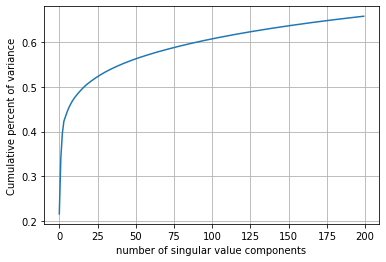

In [110]:
import matplotlib.pyplot as plt
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [113]:
n = 200 
latent_df = pd.DataFrame(latent_df[:,0:n], index=df.name.tolist())
latent_df.shape

(17695, 200)

# similarity ranking of given game

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

In [118]:
v1 = np.array(latent_df.loc['Super Stardust Ultra']).reshape(1, -1)

In [119]:
sim1 = cosine_similarity(latent_df, v1).reshape(-1)

In [120]:
sim1

array([0.03713412, 0.03713412, 0.04942554, ..., 0.07217835, 0.49033547,
       1.        ])

In [121]:
dictDf = {'content': sim1} 
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)

In [124]:
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10)

,content
Super Stardust Ultra,1.000000
Super Exploding Zoo!,0.760568
Until Dawn: Rush of Blood,0.751222
LocoRoco Remastered,0.750956
Knowledge is Power,0.748101
WipEout Omega Collection,0.742995
Kick and Fennick,0.742887
Frantics,0.728751
No Time To Explain,0.727854
The Heavy Rain & BEYOND: Two Souls Collection,0.727224


# Tuning CountVectorizer

In [149]:
count1 = CountVectorizer(stop_words='english', min_df = 0.05)
count_matrix1 = count1.fit_transform(df['metadata'])
count_df1 = pd.DataFrame(count_matrix1.toarray(), index=df.index.tolist())
count_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,315,316,317,318,319,320,321,322,323,324
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
svd1 = TruncatedSVD(n_components=60)
latent_df1 = svd1.fit_transform(count_df1)

In [153]:
# pd.DataFrame(X.toarray(),columns = tf_idf_vectorizer.get_feature_names())

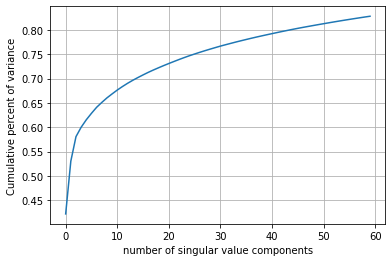

In [152]:
plt.plot(svd1.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [154]:
n1 = 100 
latent_df1 = pd.DataFrame(latent_df1[:,0:n], index=df.name.tolist())
latent_df1.shape

(17695, 60)

In [164]:
v2 = np.array(latent_df1.loc["The Battle of Polytopia"]).reshape(1, -1)

In [165]:
sim2 = cosine_similarity(latent_df1, v2).reshape(-1)

In [166]:
dictDf1 = {'content': sim2} 
recommendation_df1 = pd.DataFrame(dictDf1, index = latent_df1.index)
recommendation_df1.sort_values('content', ascending=False, inplace=True)
recommendation_df1.head(10)

,content
The Battle of Polytopia,1.000000
Dota Underlords,0.836929
BattleLore: Command,0.829405
Twilight Struggle,0.806103
Dominions 5 - Warriors of the Faith,0.798591
Techwars Deathmatch,0.777471
Oil Rush,0.771423
Skulls of the Shogun,0.769818
Demon Horde Master,0.765178
Crypt Cards,0.760458
